<a href="https://colab.research.google.com/github/SimoneFinessi/Correzioni-verifche/blob/main/corezione_verifiche_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_json("https://raw.githubusercontent.com/wtitze/4E/main/comuni_italiani.json")

In [ ]:
df

,_id,Denominazione in italiano,Provincia,Denominazione Regione,Ripartizione geografica
0,{'$oid': '619f9ec67727bc651542bb9f'},Agliè,Torino,Piemonte,Nord-ovest
1,{'$oid': '619f9ec67727bc651542bba0'},Airasca,Torino,Piemonte,Nord-ovest
2,{'$oid': '619f9ec67727bc651542bba1'},Ala di Stura,Torino,Piemonte,Nord-ovest
3,{'$oid': '619f9ec67727bc651542bba2'},Albiano d'Ivrea,Torino,Piemonte,Nord-ovest
4,{'$oid': '619f9ec67727bc651542bba3'},Almese,Torino,Piemonte,Nord-ovest
...,...,...,...,...,...
7902,{'$oid': '619f9ec67727bc651542da7d'},Villasor,Sud Sardegna,Sardegna,Isole
7903,{'$oid': '619f9ec67727bc651542da7e'},Villaspeciosa,Sud Sardegna,Sardegna,Isole
7904,{'$oid': '619fa3557727bc651542da80'},NaN,Torino,Piemonte,Nord-ovest
7905,{'$oid': '619fa3c57727bc651542da81'},NaN,Gorizia,Friuli-Venezia Giulia,Nord-est


1. numero comuni italiani

In [ ]:
len(df)

7907

In [ ]:
df[["Denominazione in italiano"]].count()

Denominazione in italiano    7904
dtype: int64

2. numero privincie italiane

In [ ]:
len(set(df["Provincia"]))

107

3. numero di provincie per ogni regione

In [ ]:
df2=df.groupby(["Denominazione Regione","Provincia"]).count()
dfgroup2=df.groupby("Denominazione Regione").count().reset_index()

In [ ]:
dfgroup2

,Denominazione Regione,_id,Denominazione in italiano,Provincia,Ripartizione geografica
0,Abruzzo,305,305,305,305
1,Basilicata,131,131,131,131
2,Calabria,404,404,404,404
3,Campania,550,550,550,550
4,Emilia-Romagna,330,330,330,330
5,Friuli-Venezia Giulia,216,215,216,216
6,Lazio,378,378,378,378
7,Liguria,234,234,234,234
8,Lombardia,1506,1506,1506,1506
9,Marche,225,225,225,225


4. numero di comuni per ogni provincia

In [ ]:
df3=df.groupby("Provincia")[["Denominazione in italiano"]].count().sort_values(by="Denominazione in italiano",ascending=False).reset_index()
df3

,Provincia,Denominazione in italiano
0,Torino,312
1,Cuneo,247
2,Bergamo,243
3,Brescia,205
4,Alessandria,187
...,...,...
102,Massa-Carrara,17
103,Ragusa,12
104,Barletta-Andria-Trani,10
105,Prato,7


5. proviancia con meno comuni

In [ ]:
dfgruop=df.groupby("Provincia").count()[["Denominazione in italiano"]]
dfgruop[dfgruop["Denominazione in italiano"]==dfgruop["Denominazione in italiano"].min()]

,Denominazione in italiano
Provincia,
Trieste,6


7. il numero medio di comuni nelle varie provincie

In [ ]:
df3.mean()

<ipython-input-38-e585dc5367fc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean()


Denominazione in italiano    73.869159
dtype: float64

8. il grafico a barre orizzontali dell'esercizion 3

<BarContainer object of 20 artists>

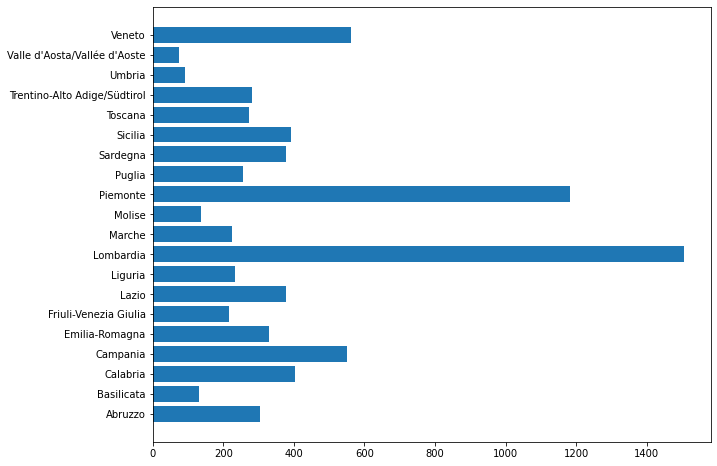

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(dfgroup2["Denominazione Regione"],dfgroup2["Provincia"])

9. grafico treemap dell'esercizio 3

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

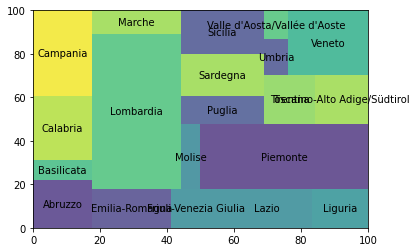

In [ ]:
squarify.plot(sizes=dfgroup2.Provincia, label=dfgroup2["Denominazione Regione"], alpha=.8)

PARTE DUE

In [ ]:
dffilm=pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/netflix_titles.csv")

In [ ]:
dffilm

In [ ]:
dffilm.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


1. il numero di film (movie)


In [ ]:
dffilm[dffilm["type"]=="Movie"].count()[["type"]]

type    6131
dtype: int64

2. il numero di film di cui non si conosce la nazione


In [ ]:
dffilm[dffilm["country"].isnull()].count()[["type"]]

type    831
dtype: int64

3. il numero di tv show rilasciati del 2010 al 2015 (estremi compresi)


In [ ]:
dffilm[(dffilm.type=="TV Show")&(dffilm["release_year"]>=2010)&(dffilm["release_year"]<=2015)].count()[["type"]]

type    457
dtype: int64

4. i titoli delle docuseries


In [ ]:
dffilm[dffilm.listed_in.str.contains("Docuseries")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN,NaN,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
25,s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
...,...,...,...,...,...,...,...,...,...,...,...,...
8712,s8713,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,"March 31, 2017",2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...


5. i titoli dei TV show che hanno nel titolo la parola zombie


In [ ]:
dffilm.title[(dffilm.type=="TV Show")&(dffilm.title.str.contains("Zombie"))]

3601        IZombie
8803    Zombie Dumb
Name: title, dtype: object

6. i film che sono stati aggiunti nel settembre 2021


In [ ]:
dffilm[(dffilm.date_added.str.contains("September"))&(dffilm.date_added.str.contains("2021"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
178,s179,Movie,The Interview,"Evan Goldberg, Seth Rogen","James Franco, Seth Rogen, Lizzy Caplan, Randal...",United States,"September 1, 2021",2014,R,112 min,"Action & Adventure, Comedies",Seth Rogen and James Franco star in this provo...
179,s180,Movie,The Nutty Professor,Tom Shadyac,"Eddie Murphy, Jada Pinkett Smith, James Coburn...",United States,"September 1, 2021",1996,PG-13,95 min,"Comedies, Romantic Movies","After being made fun of for his weight, a kind..."
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
181,s182,TV Show,Turning Point: 9/11 and the War on Terror,NaN,NaN,NaN,"September 1, 2021",2021,TV-14,1 Season,Docuseries,This unflinching series documents the 9/11 ter...


7. il numero di TV show iniziati in ogni anno


In [ ]:
dfdata=dffilm.groupby(dffilm.release_year[dffilm.type=="TV Show"])[["show_id"]].count().reset_index()
dfdata

,release_year,show_id
0,1925.0,1
1,1945.0,1
2,1946.0,1
3,1963.0,1
4,1967.0,1
5,1972.0,1
6,1974.0,1
7,1977.0,1
8,1979.0,1
9,1981.0,1


8. il grafico a barre verticali dell'esercizio 7


<BarContainer object of 46 artists>

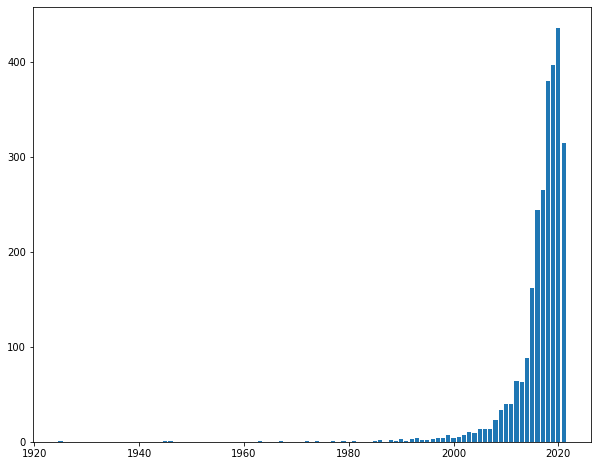

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(dfdata.release_year,dfdata.show_id)

9. il grafico a torta dell'esercizio 7

<function matplotlib.pyplot.show(*args, **kw)>

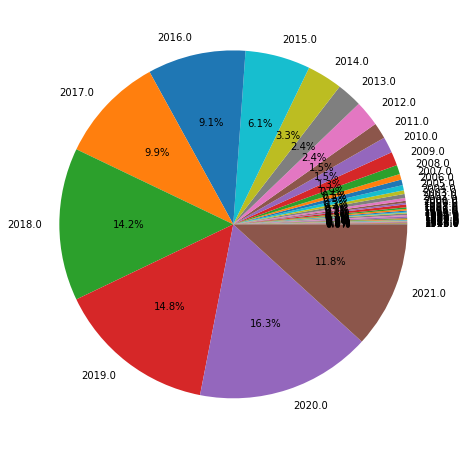

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(dfdata.show_id, labels=dfdata.release_year, autopct='%1.1f%%')
plt.show

**VERIFICA 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")

In [ ]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. eliminare tutte le righe che non hanno dati


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

2. visualizzare il numero di film per ogni lingua


In [ ]:
dfling=df.groupby("Language")[["S.no."]].count()
dfling

,S.no.
Language,
Deutsch,2
English,314
French,2
Hebrew,1
Hindi,39
Italiano,7
Japanese,13
Marathi,2
Nederlands,2


3. visualizzare il numero di show per ogni anno


In [ ]:
dfshow=df.groupby("Year of release")[["S.no."]].count().reset_index()
dfshow

,Year of release,S.no.
0,1926.0,1
1,1956.0,2
2,1957.0,1
3,1958.0,2
4,1959.0,2
5,1960.0,3
6,1967.0,1
7,1979.0,1
8,1980.0,1
9,1981.0,1


4. visualizzare gli anni in cui sono stati prodotti più di 50 show


In [ ]:
dfshow[["Year of release"]][dfshow["S.no."]>50]

,Year of release
43,2018.0


5. visualizzare l'anno in cui sono stati prodotti più show


In [ ]:
dfshow[["Year of release"]][dfshow["S.no."]==dfshow["S.no."].max()]

,Year of release
43,2018.0


6. visualizzare il numero di film drammatici inglesi del 2017


In [ ]:
df[(df.Genre.str.contains("Drama"))&(df["Year of release"]==2017.0)&(df.Language.str.contains("English"))].count()["S.no."]

20

7. visualizzare il rating medio dei film di ogni lingua


In [ ]:
dfrat=df.groupby("Language")[["IMDb rating"]].mean().reset_index()
dfrat

,Language,IMDb rating
0,Deutsch,8.100000
1,English,7.389032
2,Hindi,7.358824
3,Japanese,6.485714
4,Spanish,8.100000
5,Suomi,6.500000


8. visualizzare il grafico a barre verticali dell'esercizio 7


Text(0.5, 1.0, 'valori medi del reting dei film per le lingue')

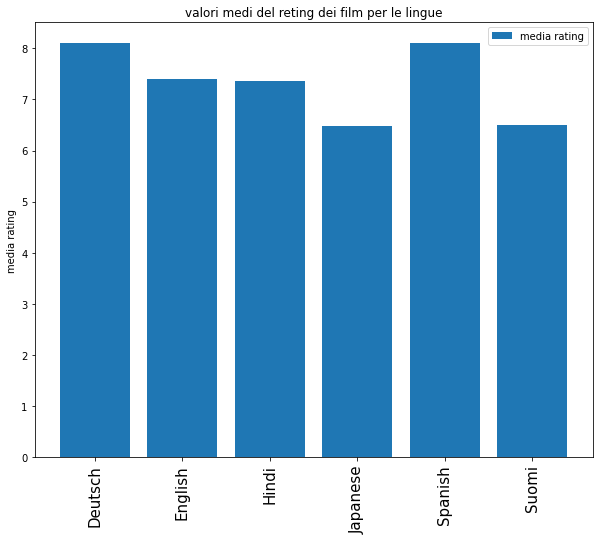

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(dfrat.Language,dfrat["IMDb rating"],label="media rating")
plt.xticks(rotation=90,fontsize=15)
ax.legend()
ax.set_ylabel('media rating')
ax.set_title('valori medi del reting dei film per le lingue')

9. visualizzare il grafico a barre orizzontali dell'esercizio 7

Text(0.5, 1.0, 'valori medi del reting dei film per le lingue')

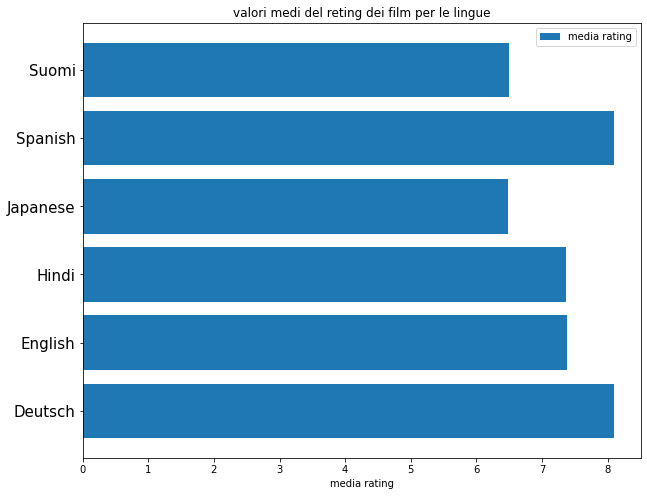

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(dfrat.Language,dfrat["IMDb rating"],label="media rating")
plt.yticks(fontsize=15)
ax.legend()
ax.set_xlabel('media rating')
ax.set_title('valori medi del reting dei film per le lingue')

parte 2

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")

In [ ]:
df2

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


1. eliminare tutte le colonne tranne borough (quartiere), cuisine e name


In [ ]:
df2 = df2.drop(columns=["grades","address","N","restaurant_id"])

In [ ]:
df2

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


2. visualizzare il numero di ristoranti dei Queens


In [ ]:
df2[df2.borough=="Queens"].count()[["borough"]]

borough    5656
dtype: int64

3. visualizzare il numero di ristoranti per ogni quartiere


In [ ]:
dfnum=df2.groupby("borough")[["cuisine"]].count().reset_index()
dfnum

,borough,cuisine
0,Bronx,2338
1,Brooklyn,6086
2,Manhattan,10259
3,Missing,51
4,Queens,5656
5,Staten Island,969


4. visualizzare il numero di tipi di cucina per ogni quartiere


In [ ]:
dfci=df2.groupby(["borough","cuisine"]).count()

dfcui=dfci.groupby("borough").count().reset_index()
dfcui

,borough,N,address,grades,name,restaurant_id
0,Bronx,52,52,52,52,52
1,Brooklyn,80,80,80,80,80
2,Manhattan,82,82,82,82,82
3,Missing,21,21,21,21,21
4,Queens,74,74,74,74,74
5,Staten Island,56,56,56,56,56


5. visualizzare i ristoranti che hanno la parola bagels nel nome


In [ ]:
df2[df2["name"].str.contains("Bagels",na=False)]

,borough,cuisine,name
3,Staten Island,Delicatessen,Bagels N Buns
64,Queens,Bagels/Pretzels,Hot Bagels
395,Staten Island,Delicatessen,Plaza Bagels & Deli
504,Manhattan,Bagels/Pretzels,Absolute Bagels
654,Manhattan,Delicatessen,Tal Bagels Deli
...,...,...,...
23517,Brooklyn,Bagels/Pretzels,Bagels & Bialys
24264,Manhattan,Bagels/Pretzels,Bagels Express
24398,Brooklyn,American,Montague St Bagels
24690,Manhattan,Bagels/Pretzels,Acts 3 Bagels


6. visualizzare i ristoranti di cui non si conosce il nome


In [ ]:
df2[df2.name.isnull()]

,borough,cuisine,name
24509,Brooklyn,Other,NaN
24526,Manhattan,Other,NaN
24527,Manhattan,Other,NaN
24528,Staten Island,Other,NaN
24571,Manhattan,Other,NaN
...,...,...,...
25345,Manhattan,Other,NaN
25346,Queens,Other,NaN
25350,Manhattan,Other,NaN
25351,Bronx,Other,NaN


7. visualizzare il quartiere con meno ristoranti


In [ ]:
dfnum[dfnum["cuisine"]==dfnum["cuisine"].min()]

,borough,cuisine
3,Missing,51


8. visualizzare il grafico treemap dell'esercizio 3


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

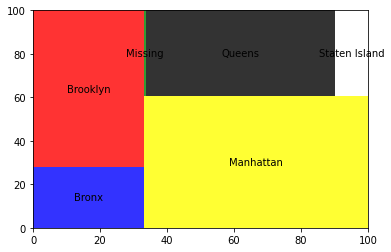

In [ ]:
squarify.plot(sizes=dfnum.cuisine, label=dfnum["borough"], alpha=.8,color=["blue","red","yellow","green","black","white"] )

9. visualizzare il grafico a torta dell'esercizio 4

<function matplotlib.pyplot.show(*args, **kw)>

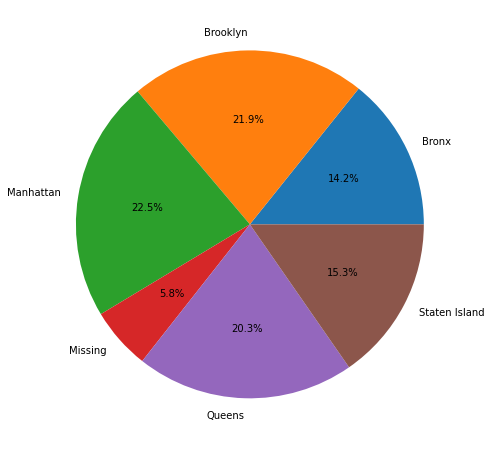

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(dfcui.name, labels=dfcui.borough, autopct='%1.1f%%')
plt.show

**VERIFICA 3**

In [ ]:
dfp=pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")
dfp

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. visualizzare le serie TV che hanno più di due stagioni


In [ ]:
dfp[dfp["No of seasons available"]>=2]

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
6,7,Homecoming,2018.0,2.0,English,Drama,7.5,16+
10,11,Comicstaan,2018.0,2.0,Hindi,"Arts, Entertainment, Culture",NaN,18+
...,...,...,...,...,...,...,...,...
380,381,LOL: Last one Laughing,2019.0,2.0,Spanish,Comedy,NaN,18+
382,383,A New Kind Of Magic,2017.0,2.0,English,Comedy,NaN,All
383,384,The Real McCoys,1958.0,6.0,English,Comedy,7.5,All
386,387,Gattu- The Power Champ,2019.0,2.0,Hindi,Kids,NaN,7+


In [ ]:
dfp.groupby(["Language","Name of the show"]).count()

2. visualizzare il numero di film per ogni lingua


In [ ]:
dfpshow=dfp.groupby(["Name of the show","Language"]).count().reset_index()
dfpshow.groupby("Language")[["Name of the show"]].count()

3. visualizzare il numero di show per ogni anno


In [ ]:
dfy=dfp.groupby("Year of release")[["S.no."]].count()
dfy

4. visualizzare gli anni in cui sono stati prodotti meno di 40 show


In [ ]:
dfy[dfy["S.no."]<40]

5. visualizzare l'anno in cui sono stati prodotti più show


In [ ]:
dfy[dfy["S.no."]==dfy["S.no."].max()]

,S.no.
Year of release,
2018.0,62


6. visualizzare il numero di commedie in hindi del 2017


In [ ]:
len(dfp[(dfp.Language=="Hindi")&(dfp["Year of release"]==2017.0)])

4

7. visualizzare il rating medio dei film di ogni lingua


In [ ]:
dfm=dfp.groupby("Language")[["IMDb rating"]].mean().reset_index()
dfm

,Language,IMDb rating
0,Deutsch,8.100000
1,English,7.389032
2,French,NaN
3,Hebrew,NaN
4,Hindi,7.358824
5,Italiano,NaN
6,Japanese,6.485714
7,Marathi,NaN
8,Nederlands,NaN
9,Russian,NaN


8. visualizzare il grafico a barre verticali dell'esercizio 7

In [ ]:
import matplotlib

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

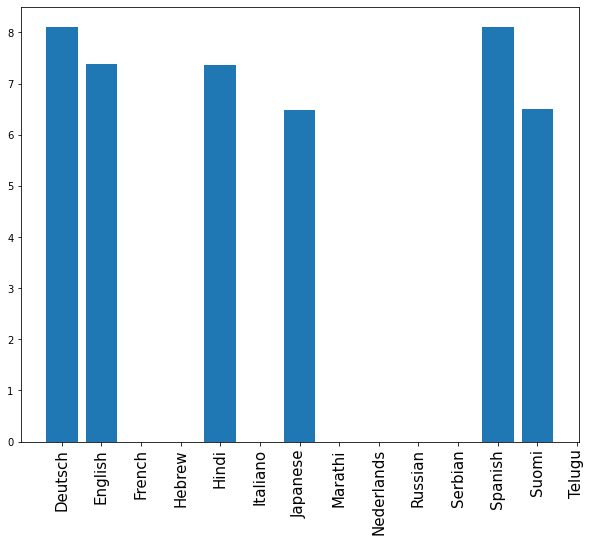

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(dfm.Language,dfm["IMDb rating"])
plt.xticks(rotation=90,fontsize=15)


9. visualizzare il grafico a barre orizzontali dell'esercizio 7

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

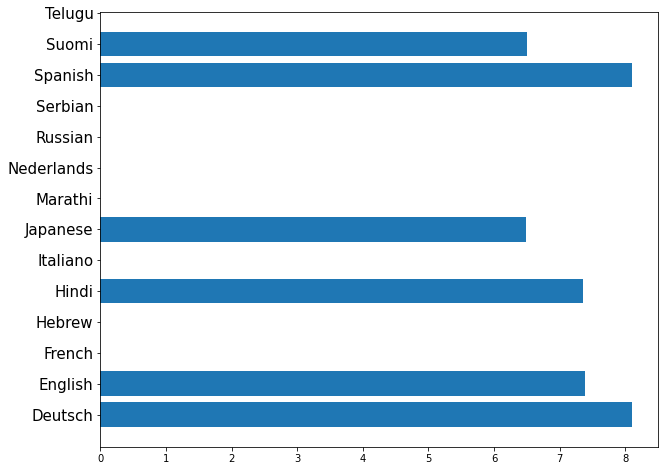

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(dfm.Language,dfm["IMDb rating"])
plt.yticks(fontsize=15)

la seconda parte e uguale alla seconda parte della prima verifica